In [1]:
from cspe.utilities import ImageDatabase
from sklearn.cluster import HDBSCAN

In [2]:
image_db = ImageDatabase.load_from_disk("imagedb.pth")

In [3]:
len(image_db.items)

4027

In [4]:
image_db[4]

{'features': {'low_level': array([45.83875326, 82.14508138, 83.62735026]),
  'semantic': array([0.0569928 , 0.02052197, 0.0028113 , 0.15097074, 0.02787059,
         0.00208804, 0.13877946, 0.01673878, 0.01671868, 0.00482398,
         0.01215854, 0.00580436, 0.00184883, 0.0039526 , 0.00176258,
         0.00054745, 0.00090347, 0.00275897, 0.26648492, 0.04429748,
         0.00906671, 0.00030091, 0.00141836, 0.00054589, 0.06318354,
         0.0027104 , 0.09264476, 0.01991973, 0.00407947, 0.01207902,
         0.00162465, 0.00324878, 0.01034224], dtype=float32)},
 'information': array([4.58387533e+01, 8.21450814e+01, 8.36273503e+01, 5.69927990e-02,
        2.05219667e-02, 2.81129614e-03, 1.50970742e-01, 2.78705861e-02,
        2.08803848e-03, 1.38779461e-01, 1.67387780e-02, 1.67186763e-02,
        4.82397806e-03, 1.21585382e-02, 5.80436271e-03, 1.84883445e-03,
        3.95259587e-03, 1.76258257e-03, 5.47452306e-04, 9.03466076e-04,
        2.75896722e-03, 2.66484916e-01, 4.42974828e-02, 9.066

In [4]:
import pandas as pd
df = pd.DataFrame(image_db.items)

In [9]:
image_db.items[0]['information'].shape

(36,)

In [5]:
df.head()


,features,information,timestamp
0,"{'low_level': [45.83875325520833, 82.145081380...","[45.83875325520833, 82.14508138020834, 83.6273...",1.742675e+09
1,"{'low_level': [45.83875325520833, 82.145081380...","[45.83875325520833, 82.14508138020834, 83.6273...",1.742675e+09
2,"{'low_level': [45.83875325520833, 82.145081380...","[45.83875325520833, 82.14508138020834, 83.6273...",1.742675e+09
3,"{'low_level': [45.83875325520833, 82.145081380...","[45.83875325520833, 82.14508138020834, 83.6273...",1.742675e+09
4,"{'low_level': [45.83875325520833, 82.145081380...","[45.83875325520833, 82.14508138020834, 83.6273...",1.742675e+09


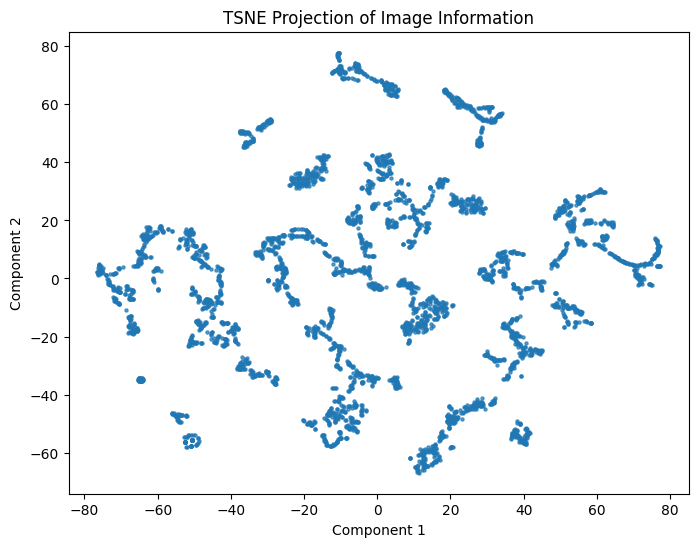

In [6]:
from sklearn.manifold import TSNE
import numpy as np

import matplotlib.pyplot as plt

# Convert the 'information' column (which contains lists) into a numpy array
X = np.array(df['information'].tolist())

# Apply TSNE to reduce the dimensions to 2
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X)

# Plot the TSNE output
plt.figure(figsize=(8, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=5, alpha=0.7)
plt.title("TSNE Projection of Image Information")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

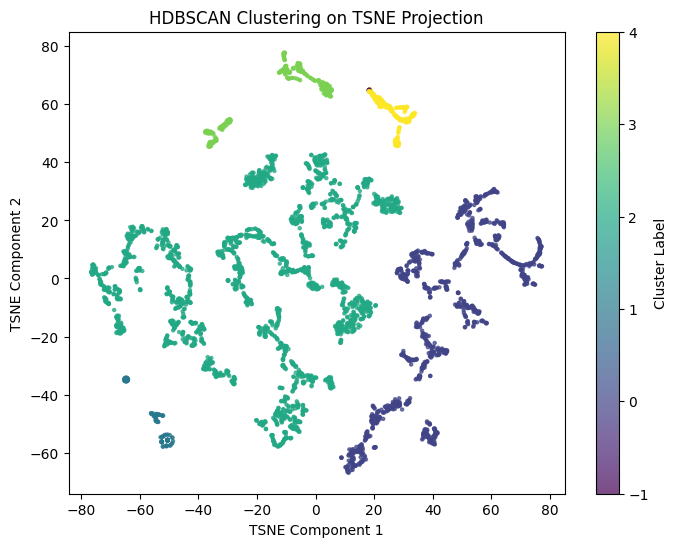

In [7]:
# Perform HDBSCAN clustering on the original high-dimensional information data
N=4000
clusterer = HDBSCAN(min_cluster_size=40)
cluster_labels = clusterer.fit_predict(X[:N])

# Plot the TSNE projection with clusters labeled by HDBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(X_embedded[:N, 0], X_embedded[:N, 1], c=cluster_labels, cmap='viridis', s=5, alpha=0.7)
plt.title("HDBSCAN Clustering on TSNE Projection")
plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.colorbar(label="Cluster Label")
plt.show()